In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [94]:
dta = sm.datasets.fair.load_pandas().data

In [95]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [58]:
dmatrices('affairs ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

(       affairs
 0     0.111111
 1     3.230769
 2     1.400000
 3     0.727273
 4     4.666666
 ...        ...
 6361  0.000000
 6362  0.000000
 6363  0.000000
 6364  0.000000
 6365  0.000000
 
 [6366 rows x 1 columns],
       Intercept  C(occupation)[T.2.0]  C(occupation)[T.3.0]  \
 0           1.0                   1.0                   0.0   
 1           1.0                   0.0                   1.0   
 2           1.0                   0.0                   1.0   
 3           1.0                   0.0                   0.0   
 4           1.0                   0.0                   1.0   
 ...         ...                   ...                   ...   
 6361        1.0                   0.0                   0.0   
 6362        1.0                   0.0                   0.0   
 6363        1.0                   0.0                   1.0   
 6364        1.0                   0.0                   1.0   
 6365        1.0                   1.0                   0.0   
 
       C(o

In [96]:
#add "affair" column: 1 represents having affairs, 0represents not 
dta['affair'] = (dta.affairs >0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [97]:
dta.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [98]:
dta['occupation_husb'].value_counts()

4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64

In [99]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


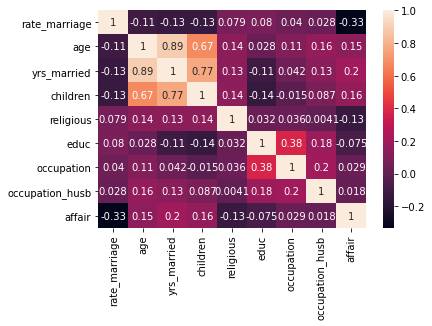

In [100]:
sns.heatmap(dta.drop(['affairs'],axis=1).corr(),annot=True)

In [101]:
import seaborn as sns

In [102]:
X.drop('Intercept',axis=1,inplace=True)

In [103]:
X.head(5)

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [104]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [105]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [106]:
dta[dta['affairs']==0].head(15)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
2053,4.0,32.0,9.0,2.0,3.0,14.0,2.0,4.0,0.0,0
2054,4.0,27.0,6.0,0.0,2.0,14.0,3.0,4.0,0.0,0
2055,4.0,22.0,2.5,0.0,2.0,14.0,3.0,2.0,0.0,0
2056,5.0,42.0,23.0,4.0,3.0,16.0,3.0,5.0,0.0,0
2057,5.0,27.0,2.5,1.0,3.0,20.0,2.0,2.0,0.0,0
2058,4.0,27.0,6.0,1.0,2.0,14.0,2.0,4.0,0.0,0
2059,4.0,42.0,23.0,5.5,2.0,12.0,3.0,2.0,0.0,0
2060,5.0,27.0,2.5,0.0,1.0,14.0,3.0,2.0,0.0,0
2061,5.0,32.0,13.0,2.0,3.0,14.0,3.0,5.0,0.0,0
2062,4.0,22.0,2.5,0.0,2.0,12.0,4.0,4.0,0.0,0


In [107]:
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


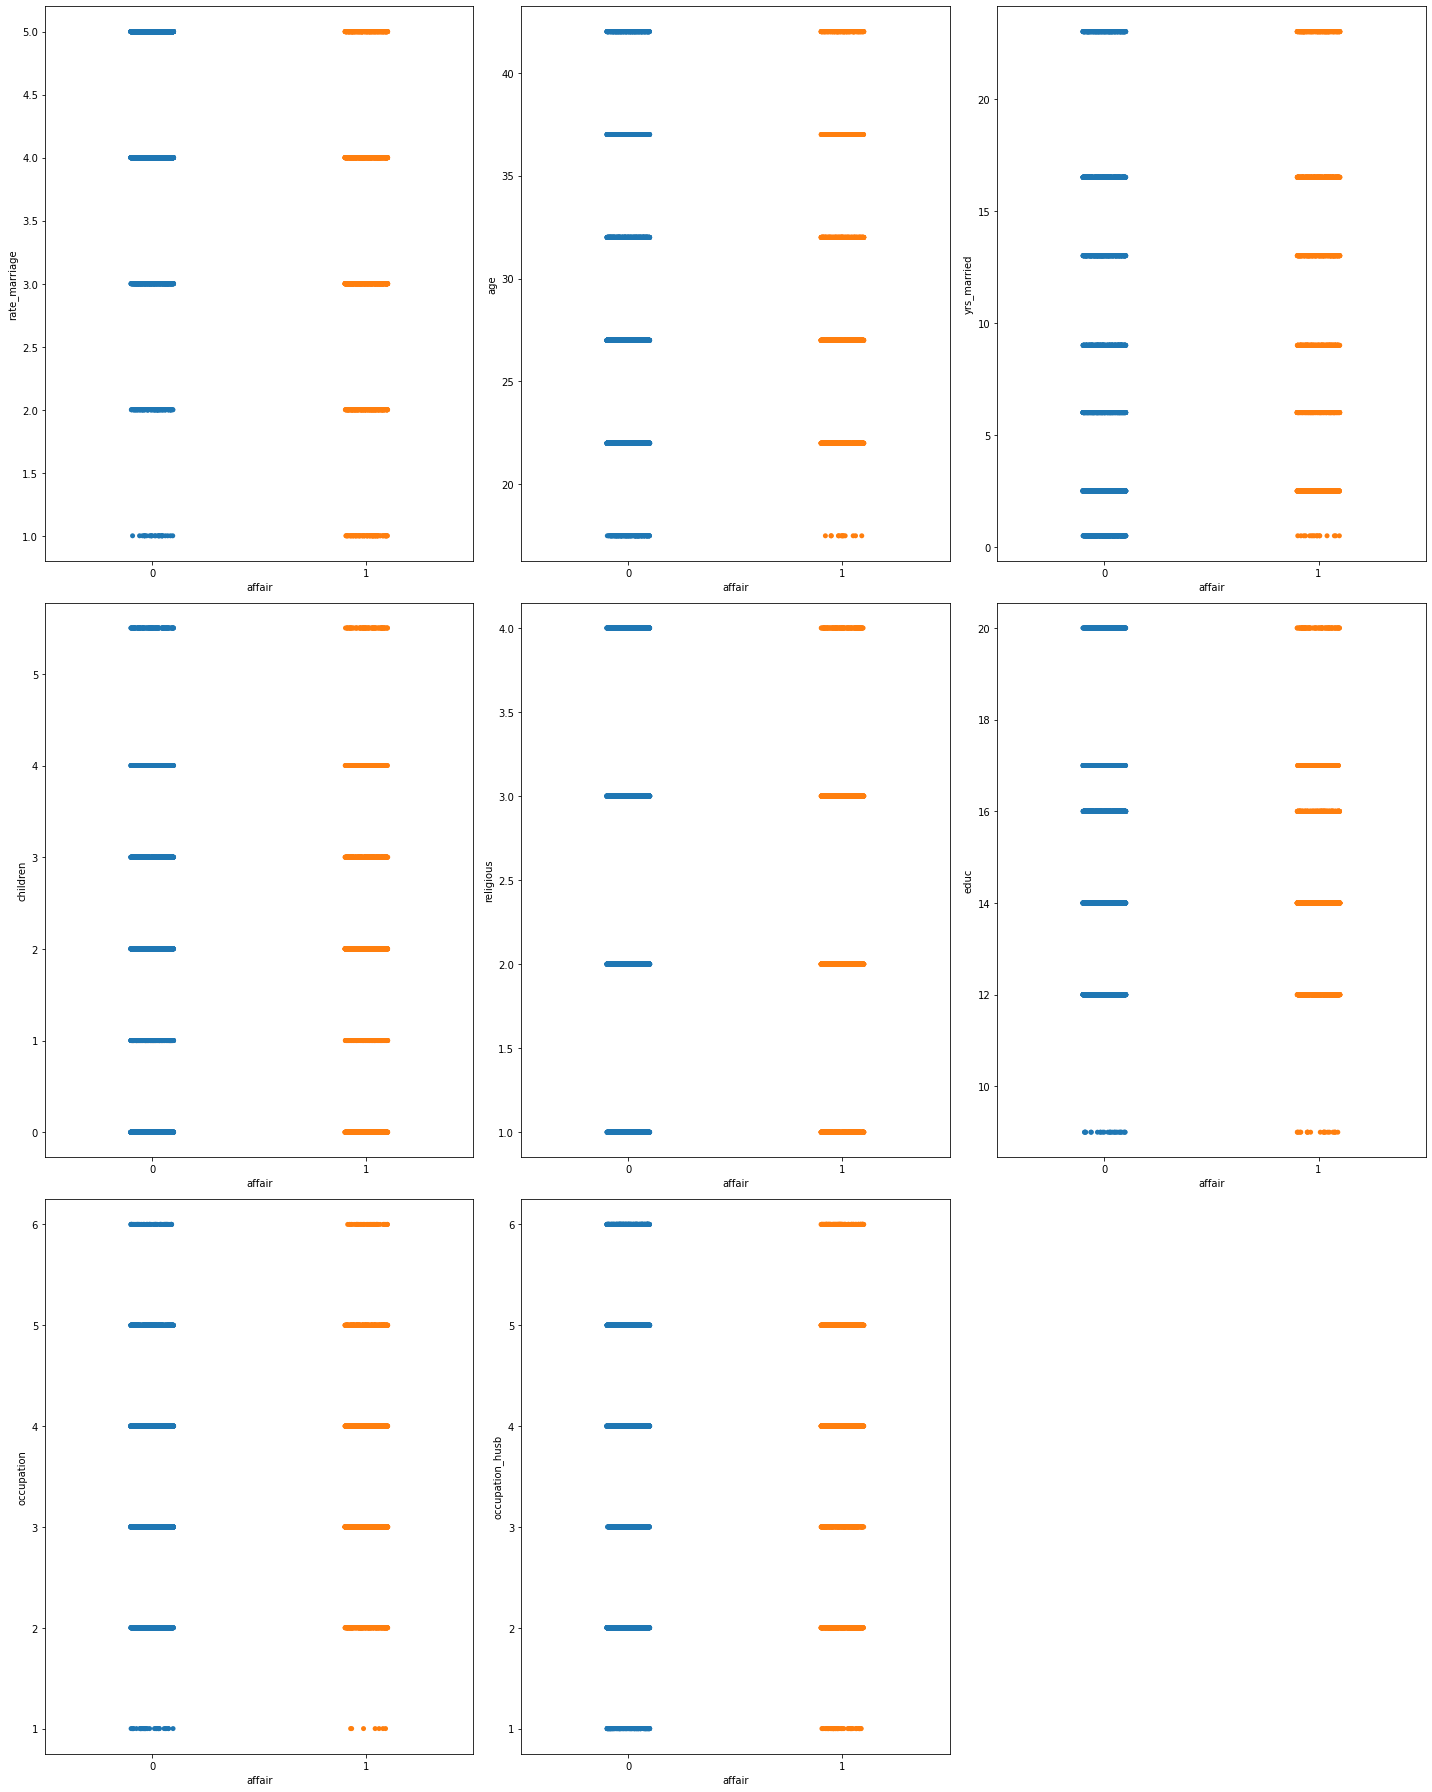

In [108]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta.drop(['affair','affairs'],axis=1):
    if plotnumber<=8 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(dta.affair,dta[column])
    plotnumber+=1
plt.tight_layout()

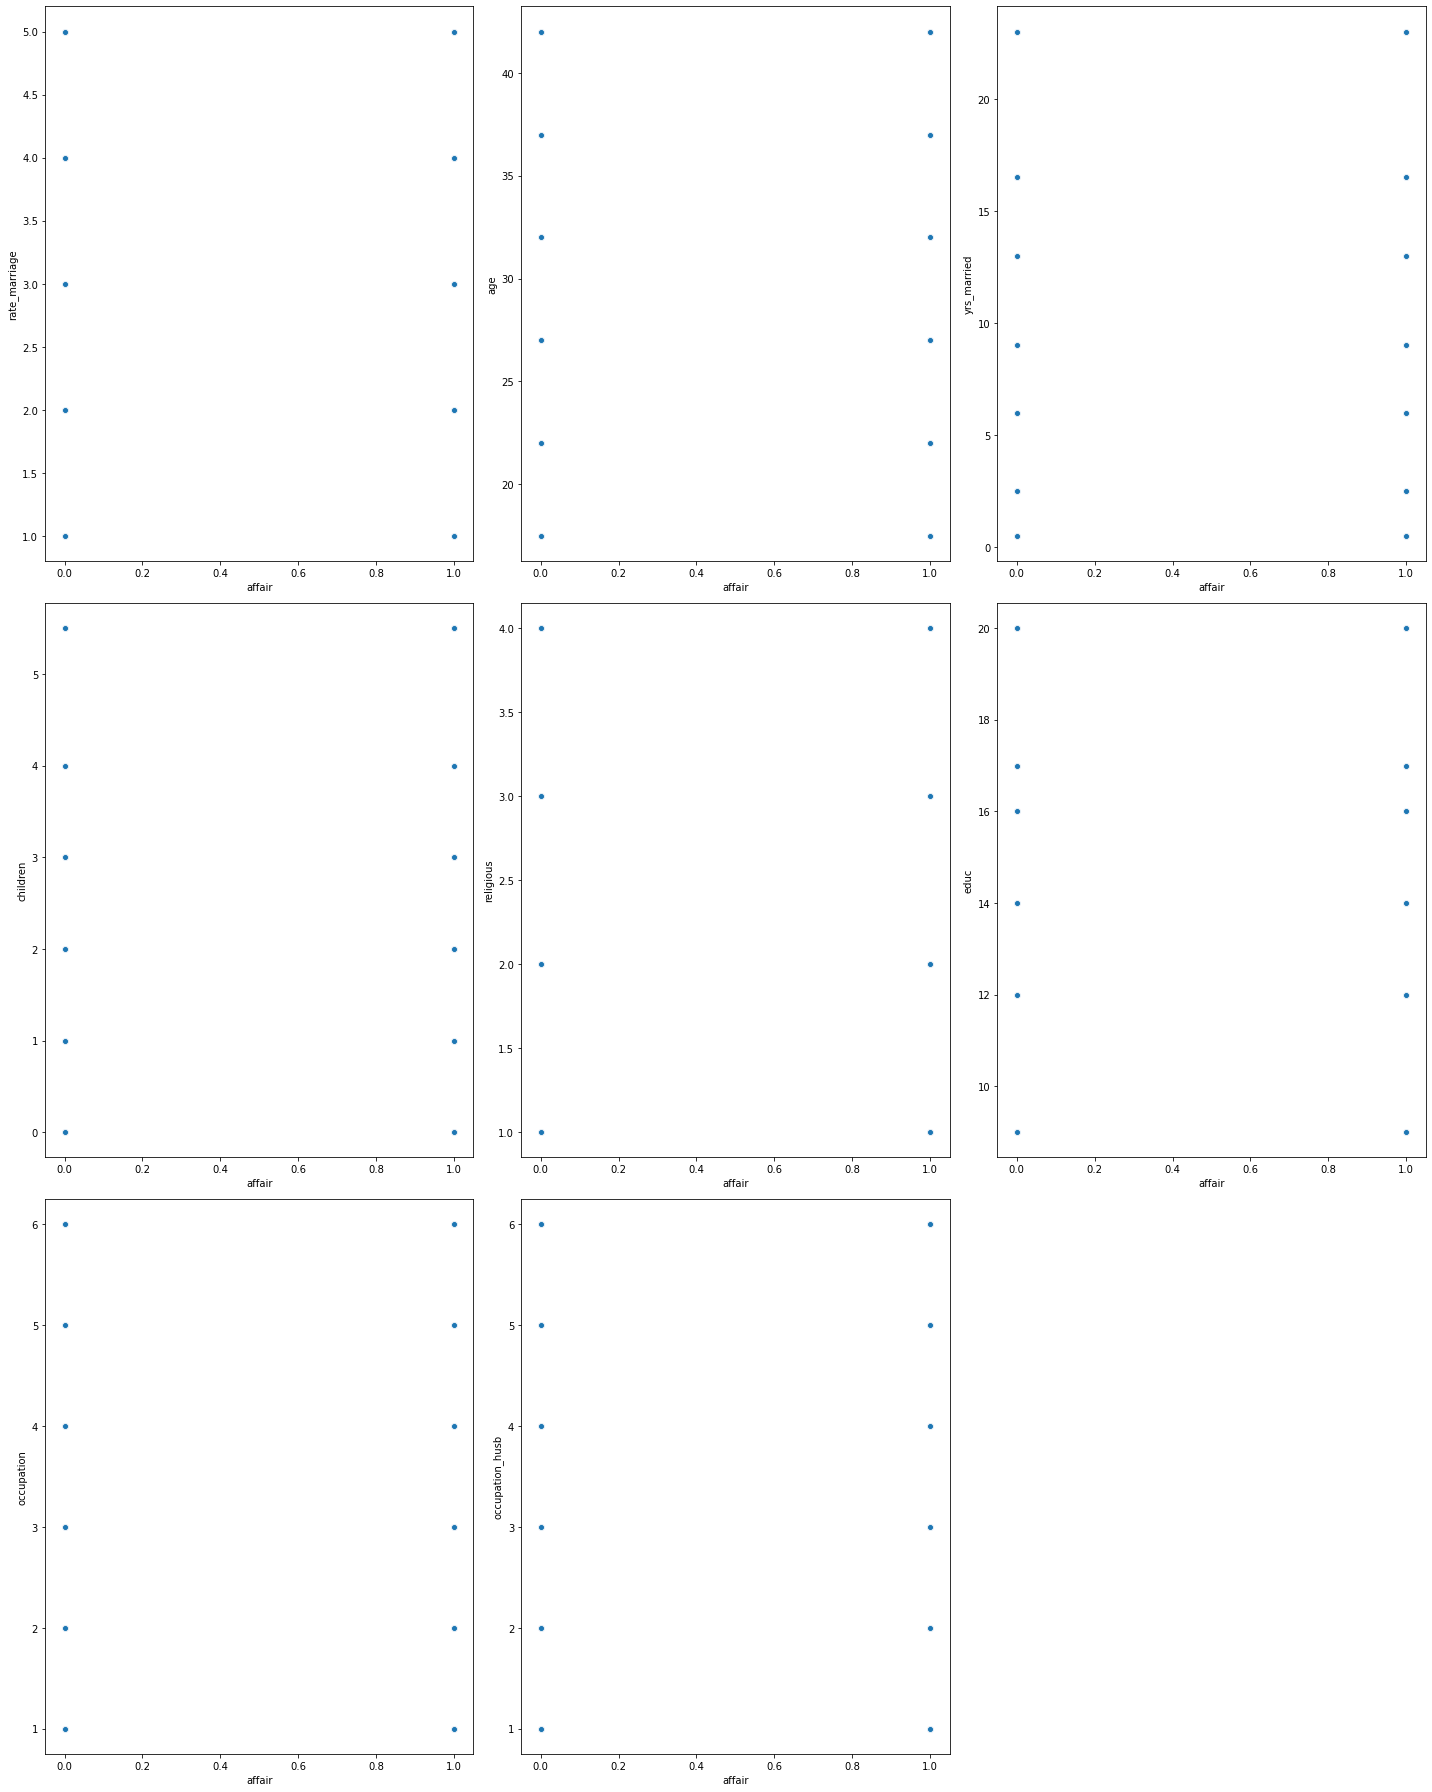

In [109]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta.drop(['affair','affairs'],axis=1):
    if plotnumber<=8 :
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(dta.affair,dta[column])
    plotnumber+=1
plt.tight_layout()

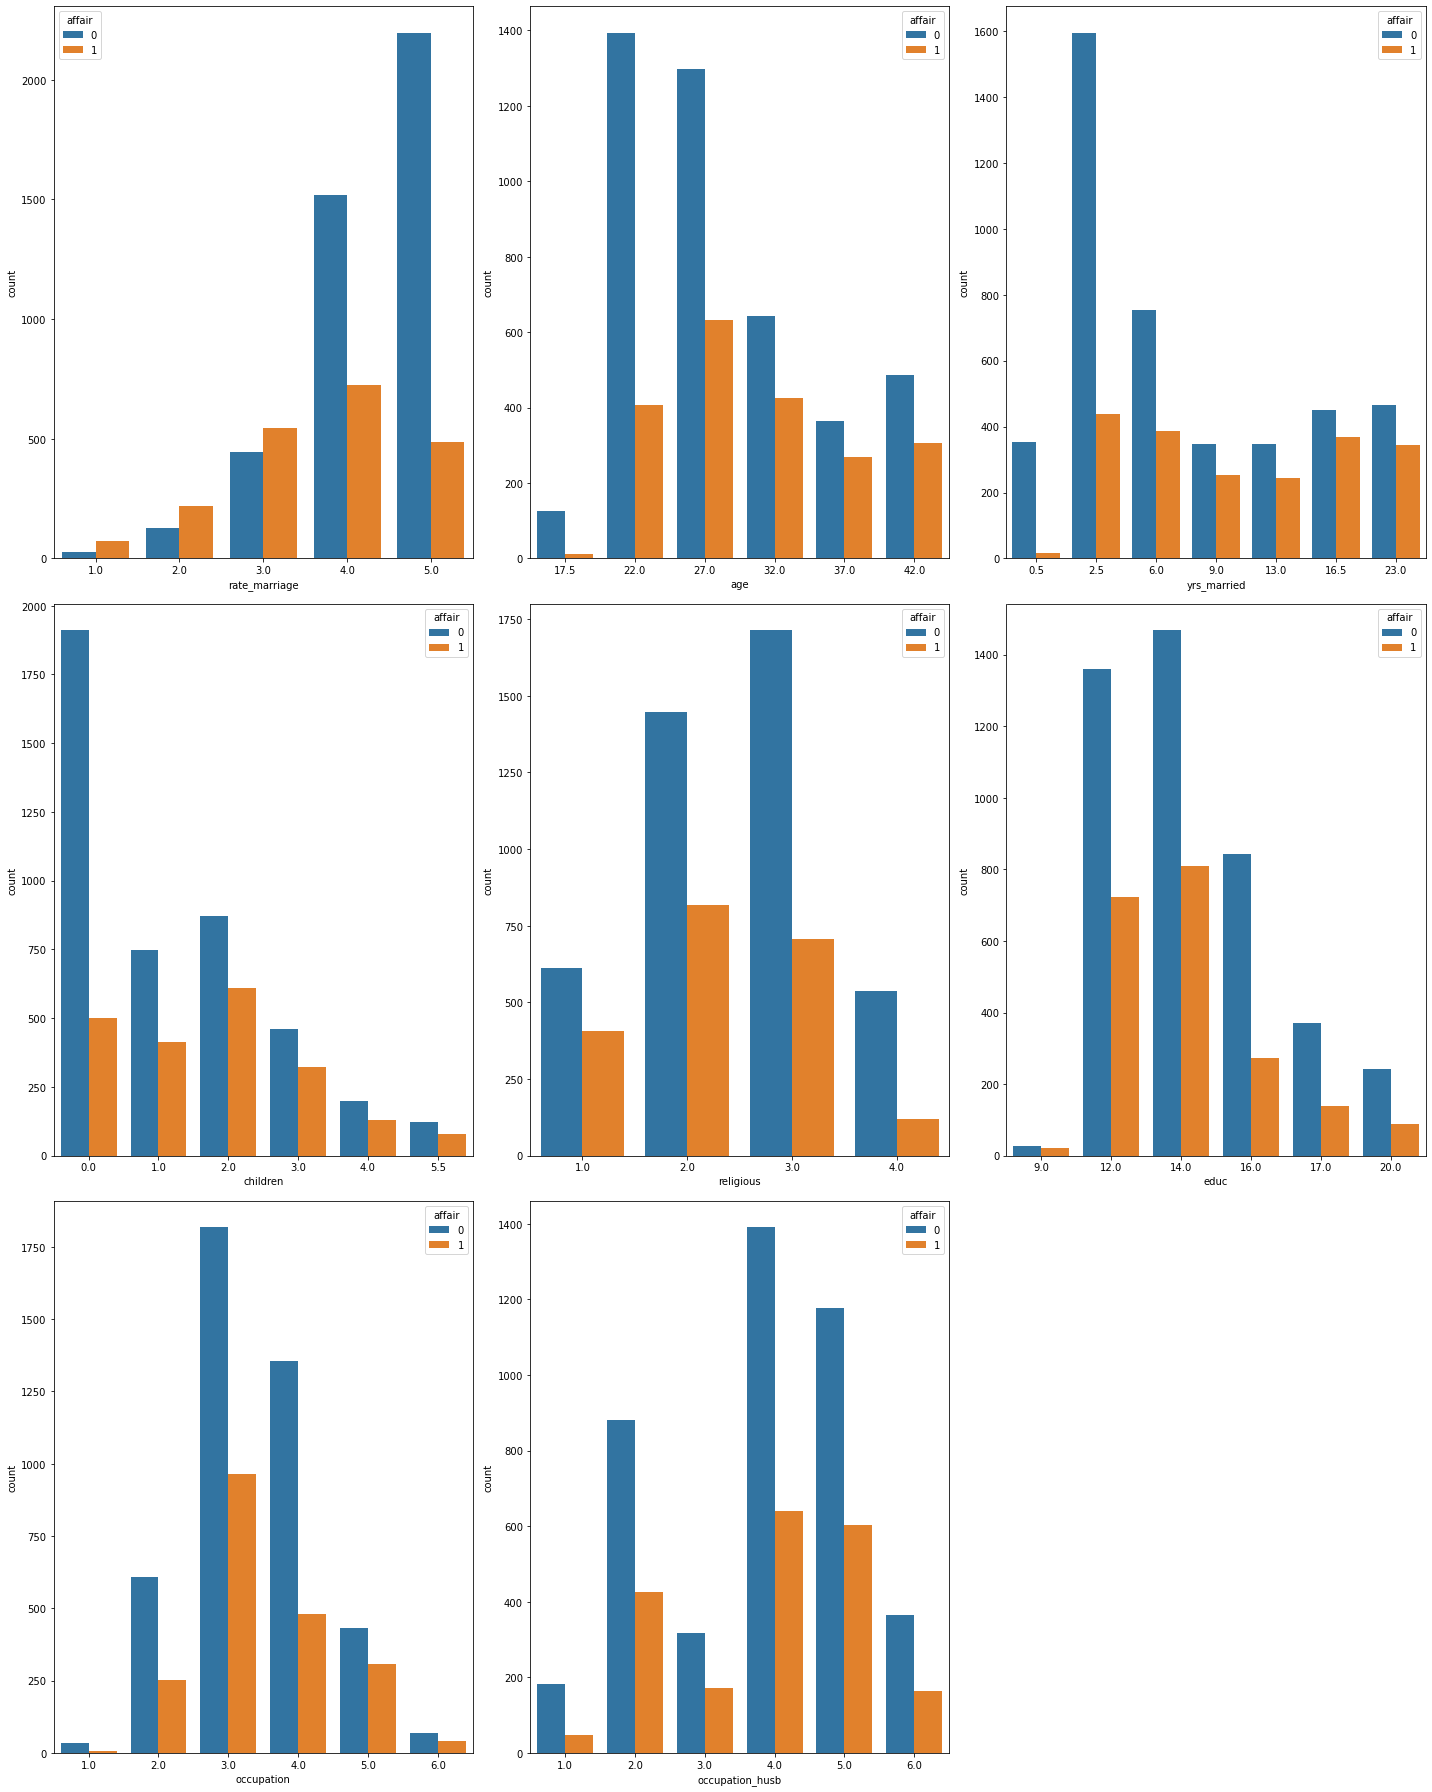

In [110]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta.drop(['affair','affairs'],axis=1):
    if plotnumber<=8 :
        ax = plt.subplot(3,3,plotnumber)
        sns.countplot(dta[column],data=dta,hue='affair')
    plotnumber+=1
plt.tight_layout()

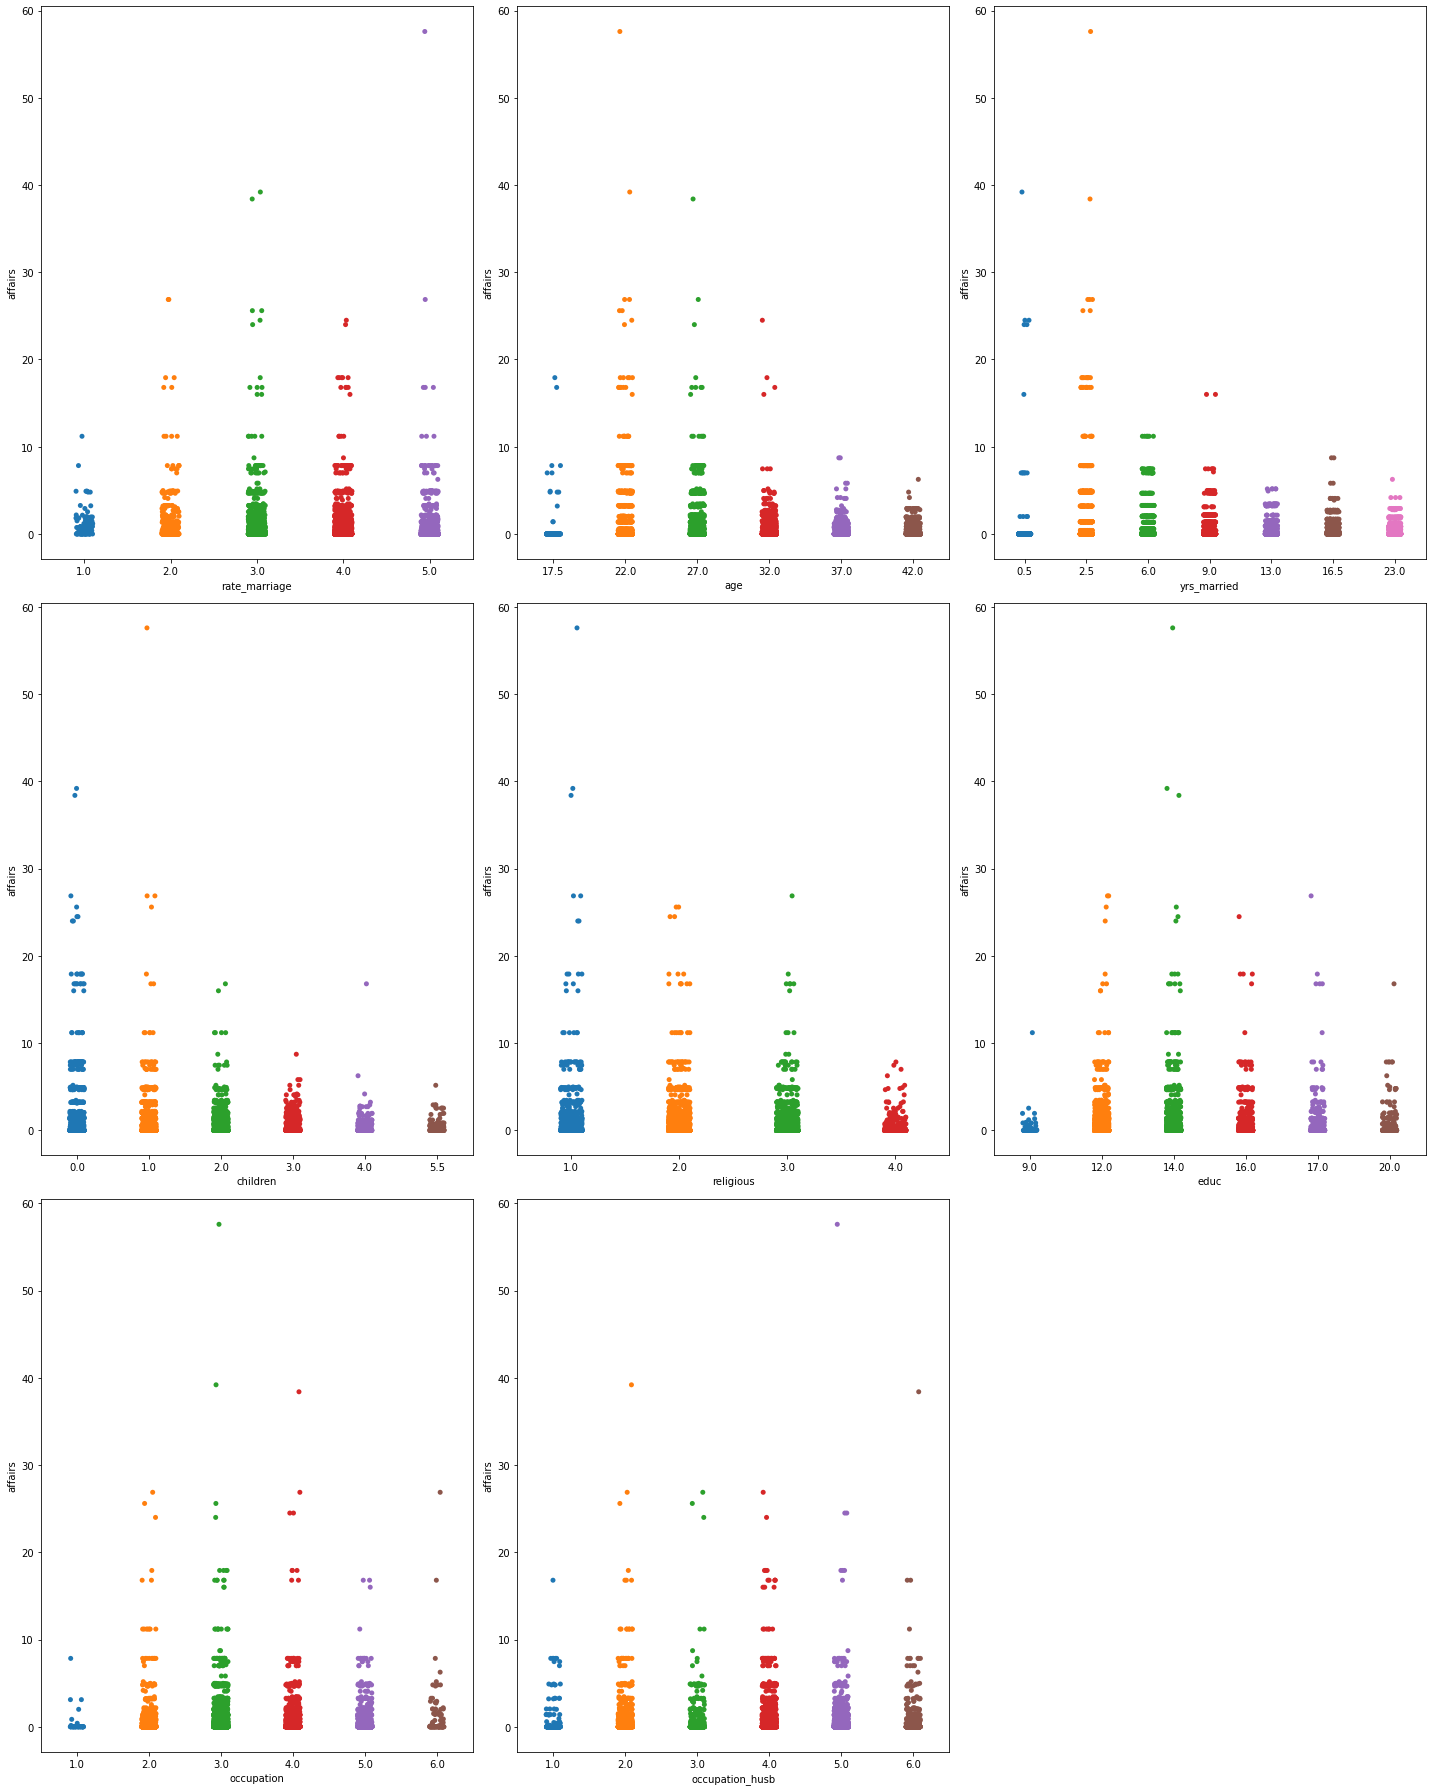

In [111]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta.drop(['affair','affairs'],axis=1):
    if plotnumber<=8 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(dta[column],dta.affairs)
    plotnumber+=1
plt.tight_layout()

In [154]:
Log_reg=LogisticRegression(max_iter=10000)

In [155]:
from sklearn.preprocessing import StandardScaler

In [156]:
sc = StandardScaler()

In [157]:
X_scaled = sc.fit_transform(X)

In [158]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=245)

In [159]:
Log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [160]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score,precision_score,recall_score,precision_recall_curve,f1_score,roc_auc_score,roc_curve
from patsy import dmatrices,dmatrix

In [161]:
Log_reg.score(x_test,y_test)

0.7349246231155779

In [162]:
Log_reg.score(x_train,y_train)

0.7182656053623796

In [163]:
cross_val_score(Log_reg,x_train,y_train,cv=10).mean()

0.7178394428216802

In [164]:
y_scores=cross_val_predict(Log_reg,x_train,y_train,cv=6,method='predict_proba')[:,1]

In [165]:
y_test[:10]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])

In [166]:
fpr,tpr,thresholds=roc_curve(y_train,y_scores)

Text(0, 0.5, 'True Positive Rate')

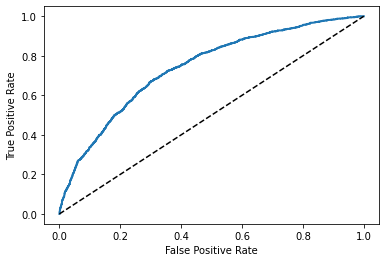

In [167]:

plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [142]:
thresholds.shape

(1979,)

In [168]:
precisions,recalls,thresholds=precision_recall_curve(y_train,y_scores)

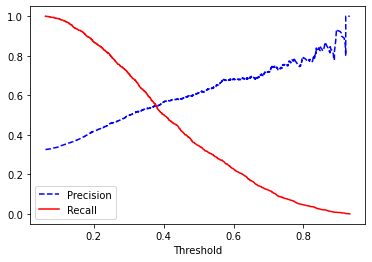

In [169]:
plt.plot(thresholds,precisions[:-1],'b--',label='Precision')
plt.plot(thresholds,recalls[:-1],'r-',label='Recall')
plt.xlabel('Threshold')
plt.legend()

In [147]:
from sklearn.metrics import classification_report

In [171]:
print(classification_report(y_test,Log_reg.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82      1086
         1.0       0.63      0.40      0.49       506

    accuracy                           0.73      1592
   macro avg       0.70      0.64      0.65      1592
weighted avg       0.72      0.73      0.71      1592

